Importando las librerías necesarias:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Cargando el archivo:

In [4]:
df = pd.read_csv('Mobiles Dataset (2025).csv',encoding="latin1")

Iniciando el procesamiento de datos:

Este código elimina simbolo de moneda y convierte los precios a números

In [5]:
for col in df.columns:
    if "Price" in col:
        df[col] = df[col].str.extract(r'([\d,]+)').replace(',', '', regex=True).astype(float)

Este codigo elimina abreviaciones como GB, MB, mAh, etc.

In [26]:
def limpiar_columna(df, columna, texto_extra):
    return (
        df[columna]
        .astype(str)
        .str.replace(texto_extra, "", regex=False)
        .str.extract(r'(\d+\.?\d*)')
        .astype(float)
    )

df["RAM"] = limpiar_columna(df, "RAM", "GB")
df["Back Camera"] = limpiar_columna(df, "Back Camera", "MP")
df["Battery Capacity"] = limpiar_columna(df, "Battery Capacity", "mAh")
df["Mobile Weight"] = limpiar_columna(df, "Mobile Weight","g")
df["Front Camera"] = limpiar_columna(df, "Front Camera","MP")
df["Screen Size"] = limpiar_columna(df, "Screen Size"," inches")


Mostrando algunos datos para verificar el tratamiento de los mismos:

In [27]:
print(df.head())

  Company Name            Model Name  Mobile Weight  RAM  Front Camera  \
0        Apple       iPhone 16 128GB          174.0  6.0          12.0   
1        Apple       iPhone 16 256GB          174.0  6.0          12.0   
2        Apple       iPhone 16 512GB          174.0  6.0          12.0   
3        Apple  iPhone 16 Plus 128GB          203.0  6.0          12.0   
4        Apple  iPhone 16 Plus 256GB          203.0  6.0          12.0   

   Back Camera   Processor  Battery Capacity  Screen Size  \
0         48.0  A17 Bionic            3600.0          6.1   
1         48.0  A17 Bionic            3600.0          6.1   
2         48.0  A17 Bionic            3600.0          6.1   
3         48.0  A17 Bionic            4200.0          6.7   
4         48.0  A17 Bionic            4200.0          6.7   

   Launched Price (Pakistan)  Launched Price (India)  Launched Price (China)  \
0                   224999.0                 79999.0                  5799.0   
1                   234999.0

Comenzamos a obtener datos básicos:

Contar cuantos modelos lanzó cada marca.

In [28]:
modelosPorMarca = df["Company Name"].value_counts()
print(modelosPorMarca)

Company Name
Oppo        129
Apple        97
Honor        91
Samsung      88
Vivo         86
Realme       69
Motorola     62
Infinix      56
OnePlus      53
Huawei       42
Tecno        39
POCO         30
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
iQOO          3
Poco          2
Name: count, dtype: int64


Evolución del precio en USA por año, el objetivo es promediar precios por año y graficarlos:

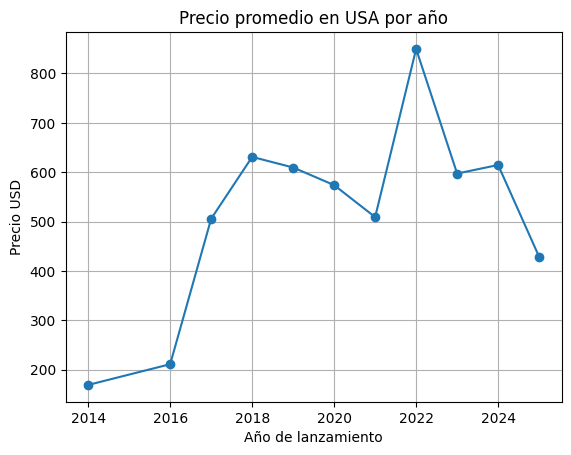

In [33]:
precioPromedio = df.groupby("Launched Year")["Launched Price (USA)"].mean()
precioPromedio.plot(kind="line", marker = "o", title = "Precio promedio en USA por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Precio USD")
plt.grid(True)
plt.show()

Identificar si hay un a relación entre la cantidad de memoria RAM y la cantidad de batería. Ver si los celulares con más RAM tienden a tener más batería.

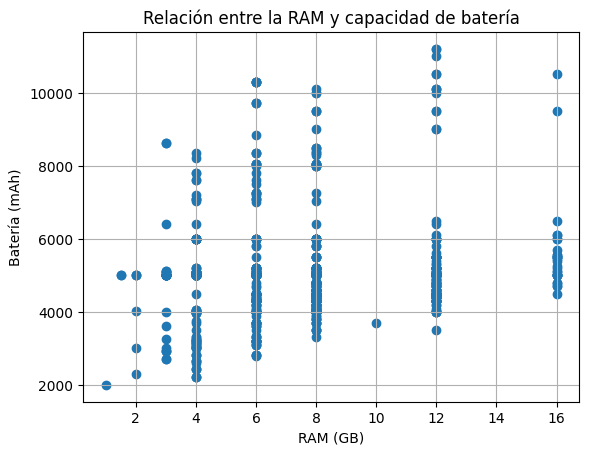

In [34]:
plt.scatter(df["RAM"], df["Battery Capacity"])
plt.title("Relación entre la RAM y capacidad de batería")
plt.xlabel("RAM (GB)")
plt.ylabel("Batería (mAh)")
plt.grid(True)
plt.show()

¿Dónde son más caros los celulares? Comparar el precio promedio de cada país:

In [35]:
preciosCols = [col for col in df.columns if "Price" in col]
promedios = df[preciosCols].mean().sort_values(ascending=False)
print(promedios)

Launched Price (Pakistan)    125436.063509
Launched Price (India)        50576.818280
Launched Price (China)         3821.430108
Launched Price (Dubai)         2183.933333
Launched Price (USA)            625.512903
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

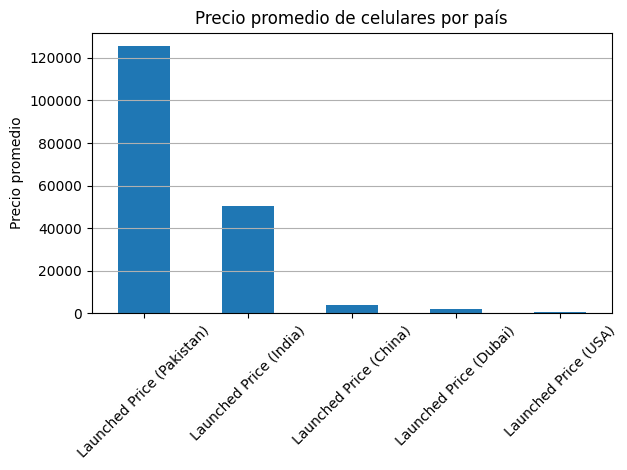

In [44]:
#Grafica
promedios.plot(kind="bar", title="Precio promedio de celulares por país")
plt.ylabel("Precio promedio")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show